In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from discretize import discretize

In [20]:
plt.rcParams['figure.figsize'] = [5, 5]

In [21]:
data = pd.read_excel('./dataset.xls')

In [22]:
data.drop('Unnamed: 0', axis = 1, inplace = True)


In [29]:
# data = data.iloc[: , 1:]

In [23]:
data

,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date
0,Konex,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255.0,2016-01-04,2016-05-24
1,Finjob,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45.0,2016-01-04,2016-11-02
2,Kinnamplus,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,NaN,2016-01-06,2016-12-07
3,Genco Pura Olive Oil Company,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054.0,2016-01-06,2016-09-11
4,Stanredtax,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180.0,2016-01-07,2016-01-31
...,...,...,...,...,...,...,...,...,...
7795,Vehement Capital Partners,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,In Progress,GTX Basic,590.0,2018-12-30,2019-07-22
7796,Hottechi,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,In Progress,MG Advanced,3284.0,2018-12-30,2019-05-26
7797,Umbrella Corporation,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Pro,300.0,2018-12-31,2019-04-15
7798,Rundofase,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284.0,2018-12-31,2019-05-16


In [24]:
data.isna().sum()

Customer                0
Agent                   0
SalesAgentEmailID       0
ContactEmailID          0
Stage                   0
Product                 0
Close_Value          1208
Created Date            0
Close Date              0
dtype: int64

In [25]:
# fill na values with mean
close_value_mean =data['Close_Value'].mean()
data['Close_Value'].fillna(close_value_mean, inplace = True)

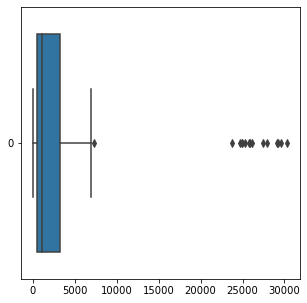

In [26]:
ax = sns.boxplot(data=data['Close_Value'], orient="h")

In [7]:
#precentage
data['Product'].value_counts(normalize=True)

GTX Basic         0.211538
MG Special        0.187692
GTXPro            0.167821
MG Advanced       0.160513
GTX Plus Basic    0.157051
GTX Plus Pro      0.110513
GTK 500           0.004872
Name: Product, dtype: float64

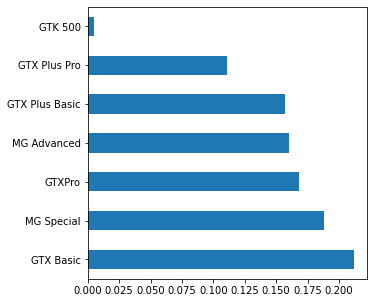

In [27]:
data['Product'].value_counts(normalize=True).plot.barh()

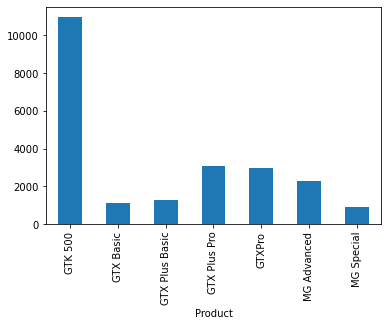

In [60]:
data.groupby('Product')['Close_Value'].mean().plot.bar()
plt.show()

In [14]:
data['Stage'] = data['Stage'].astype('category')
data.dtypes

Customer                     object
Agent                        object
SalesAgentEmailID            object
ContactEmailID               object
Stage                      category
Product                      object
Close_Value                 float64
Created Date         datetime64[ns]
Close Date           datetime64[ns]
dtype: object

In [28]:
discretize(data)

# data['Stage']=data['Stage'].cat.codes
#2->won
#1->lost
#0-> in progress

In [29]:
data

,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date
0,Konex,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,1,GTX Plus Basic,1255.000000,2016-01-04,2016-05-24
1,Finjob,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,1,MG Special,45.000000,2016-01-04,2016-11-02
2,Kinnamplus,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,-1,MG Special,1852.915504,2016-01-06,2016-12-07
3,Genco Pura Olive Oil Company,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,0,MG Advanced,1054.000000,2016-01-06,2016-09-11
4,Stanredtax,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,1,MG Advanced,3180.000000,2016-01-07,2016-01-31
...,...,...,...,...,...,...,...,...,...
7795,Vehement Capital Partners,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,0,GTX Basic,590.000000,2018-12-30,2019-07-22
7796,Hottechi,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,0,MG Advanced,3284.000000,2018-12-30,2019-05-26
7797,Umbrella Corporation,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,0,GTX Plus Pro,300.000000,2018-12-31,2019-04-15
7798,Rundofase,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,0,MG Special,3284.000000,2018-12-31,2019-05-16


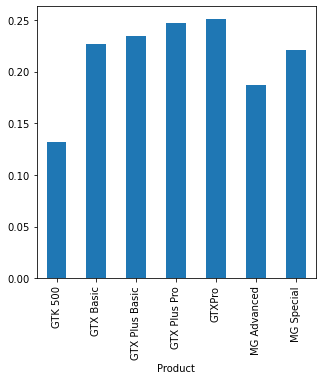

In [30]:
data.groupby('Product')['Stage'].mean().plot.bar()

In [74]:
result = pd.pivot_table(data=data, index='Agent', columns='Product',values='Stage')
result

Product,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special
Agent,,,,,,,
Anna Snelling,NaN,1.263158,1.297872,1.155172,NaN,1.000000,1.197740
Boris Faz,NaN,1.093750,1.117647,1.121212,1.269231,1.076923,1.294118
Cassey Cress,NaN,1.261538,1.122807,1.131579,1.344828,1.236111,1.000000
Cecily Lampkin,NaN,1.391304,1.307692,1.407407,NaN,1.196429,1.224490
Corliss Cosme,1.000000,1.125000,1.196078,1.250000,1.271186,0.896552,1.095238
Daniell Hammack,NaN,0.954545,1.138462,1.114286,1.212121,1.038462,1.076923
Darcel Schlecht,1.000000,1.258065,1.158416,1.163934,1.158385,1.220588,1.137255
Donn Cantrell,NaN,1.633333,1.571429,1.571429,1.548387,1.658537,1.375000
Elease Gluck,0.944444,1.318182,1.285714,0.571429,1.076923,1.280000,1.049180


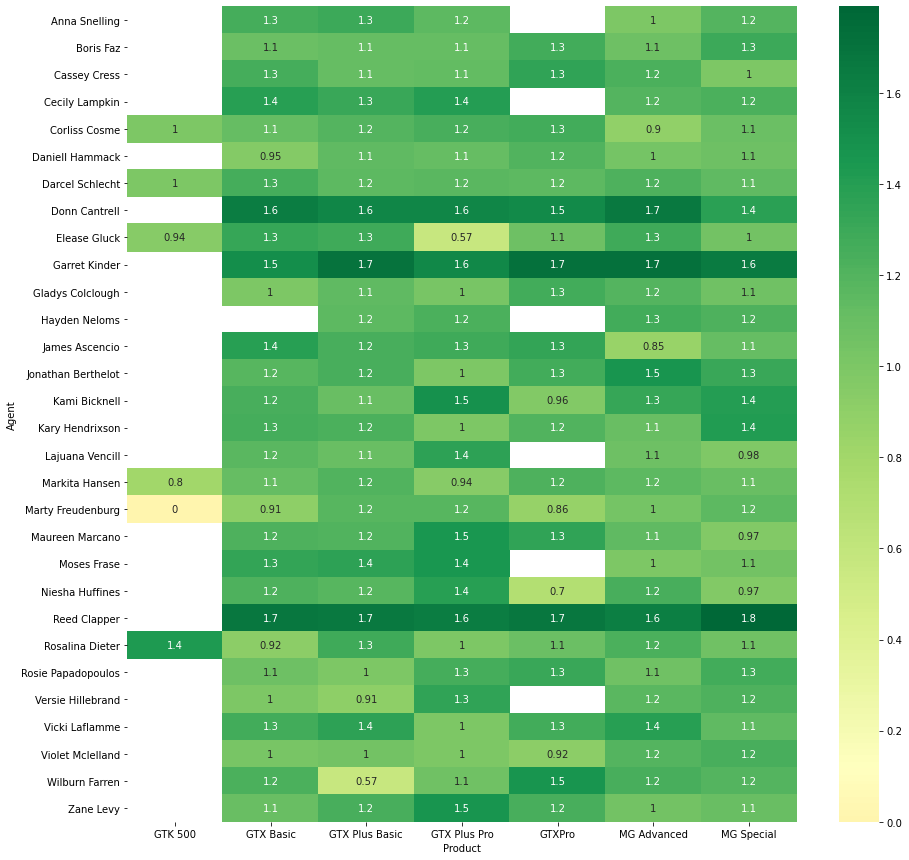

In [88]:
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117 )
plt.show()